In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('Price_euros_train.csv', sep = ',')
df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
1,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
2,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
3,6,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,400.00
4,7,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04kg,2139.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103,1315,Asus,X556UJ-XO044T (i7-6500U/4GB/500GB/GeForce,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4GB,500GB HDD,Nvidia GeForce 920M,Windows 10,2.2kg,720.32
1104,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1105,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1106,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


Удаляю признаки, выраженные строковыми значениями и столбец laptop_ID (просто порядковый номер).

 Product - имеем слишком много различных моделей. Company - аналогично.

In [ ]:
df = df.drop(['laptop_ID', 'Product'], axis = 1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1108 entries, 0 to 1107
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1108 non-null   object 
 1   TypeName          1108 non-null   object 
 2   Inches            1108 non-null   float64
 3   ScreenResolution  1097 non-null   object 
 4   Cpu               1108 non-null   object 
 5   Ram               1108 non-null   object 
 6   Memory            1108 non-null   object 
 7   Gpu               1108 non-null   object 
 8   OpSys             1055 non-null   object 
 9   Weight            1086 non-null   object 
 10  Price_euros       1108 non-null   float64
dtypes: float64(2), object(9)
memory usage: 95.3+ KB


Пропуски имеем в признаках ScreenResolution, Weight и OpSys

# Заполнение пропусков


In [ ]:
df.Weight = df.Weight.str.replace('kg', '')
df.Weight = pd.to_numeric(df.Weight)

Большая часть ноутбуков имеет вес от 1,5 до 2,8 кг. Модой является 2,2 кг, как раз таки, что явяется средним значением в диапазоне от 1,5 до 2,8. Имеет место заполнить модой.

In [ ]:
df.Weight.value_counts()

2.200    109
2.100     51
2.000     40
2.400     37
2.300     32
        ... 
1.190      1
1.410      1
3.600      1
3.400      1
2.191      1
Name: Weight, Length: 163, dtype: int64

In [ ]:
buf = df[df.Weight >= 1.5]
buf = buf[buf.Weight <= 2.8]
len(buf)

740

In [ ]:
df['Weight'] = df['Weight'].fillna(df.Weight.mode()[0])

Пропуски в OpSys заполним модой отдельно для каждой компании. 

In [ ]:
os = list(df.OpSys)
for i in range(len(os)):
  if not(isinstance(os[i], str)):
    os[i] = df[df.Company == df.loc[i].Company].OpSys.mode()[0]
df.OpSys = os
df = df.drop('Company', axis = 1)

# Преобразовываем Ram в числа

In [ ]:
df.Ram.value_counts()

8GB     525
4GB     323
16GB    172
6GB      34
12GB     19
2GB      18
32GB     13
24GB      3
64GB      1
Name: Ram, dtype: int64

In [ ]:
df.Ram = df.Ram.str.replace('GB', '')
df.Ram = pd.to_numeric(df.Ram)

# Преобразование Memory

In [ ]:
df.Memory.value_counts()

256GB SSD                        344
1TB HDD                          187
500GB HDD                        118
512GB SSD                        100
128GB SSD +  1TB HDD              81
256GB SSD +  1TB HDD              66
128GB SSD                         64
32GB Flash Storage                34
2TB HDD                           14
64GB Flash Storage                12
1TB SSD                           11
512GB SSD +  1TB HDD              11
256GB SSD +  2TB HDD               9
16GB Flash Storage                 7
1.0TB Hybrid                       7
32GB SSD                           5
256GB Flash Storage                5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
180GB SSD                          3
128GB SSD +  2TB HDD               2
16GB SSD                           2
256GB SSD +  256GB SSD             2
256GB SSD +  500GB HDD             2
1TB SSD +  1TB HDD                 2
512GB Flash Storage                2
64GB SSD                           1
2

In [ ]:
def get_value(x):
    gb = 0
    tb = 0
    if ('GB' in x):
        gb = float(x.split('GB')[0])
    if ('TB' in x):
        tb = float(x.split('TB')[0])
    return gb + tb * 1024

In [ ]:
def Memory(x):
    hdd, ssd, flash = 0, 0, 0
    x = x.split(' + ')
    for i in x:
        if ('Flash' in i):
            val = i.split('Flash')[0]
            flash += get_value(i)
        if ('SSD' in i):
            val = i.split('SSD')[0]
            ssd += get_value(i)
        if ('HDD' in i):
            val = i.split('HDD')[0]
            hdd += get_value(i)
    return {'HDD': hdd, 'SSD': ssd, 'Flash Storage': flash}

In [ ]:
new_memory = {i: Memory(df['Memory'].values[i]) for i in range(len(df))}
new_memory = pd.DataFrame(new_memory).T
new_memory.head(5)

,HDD,SSD,Flash Storage
0,0.0,0.0,128.0
1,0.0,512.0,0.0
2,0.0,256.0,0.0
3,500.0,0.0,0.0
4,0.0,0.0,256.0


In [ ]:
df = pd.merge(df, new_memory, left_index = True, right_index = True, how = 'left')
df = df.drop('Memory', axis = 1)
df.head(4)

,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,HDD,SSD,Flash Storage
0,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,898.94,0.0,0.0,128.0
1,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,macOS,1.83,2537.45,0.0,512.0,0.0
2,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0.0,256.0,0.0
3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4,AMD Radeon R5,Windows 10,2.10,400.00,500.0,0.0,0.0


# Преобразование значений CPU

In [ ]:
df.Cpu.value_counts()

Intel Core i5 7200U 2.5GHz              158
Intel Core i7 7700HQ 2.8GHz             123
Intel Core i7 7500U 2.7GHz              116
Intel Core i5 8250U 1.6GHz               63
Intel Core i7 8550U 1.8GHz               63
                                       ... 
Intel Celeron Dual Core N3350 2.0GHz      1
Intel Core M 7Y30 1.0GHz                  1
Intel Xeon E3-1535M v6 3.1GHz             1
Intel Core i3 6100U 2.1GHz                1
AMD A9-Series 9410 2.9GHz                 1
Name: Cpu, Length: 112, dtype: int64

In [ ]:
df.Cpu = [float(i[-1].replace('GHz', '')) for i in (df.Cpu.str.split(' ').values)]

# Преобразование Screen Resolution
Идея - вынести длину и ширину в два отдельных столбца. 

Например, 1920х1080 разделяем на 1920 и 1080

In [ ]:
sc = df.ScreenResolution
length = np.zeros(len(sc))
width = np.zeros(len(sc))

for i in range(len(sc)):
  if not(isinstance(sc[i], str)):
    length[i] = np.nan
    width[i] = np.nan
    continue
  j = 0
  res = ''
  while j < len(sc[i]):
    if sc[i][j].isdigit():
      res += sc[i][j]
    j += 1

  h = res[:4]
  w = res[4:]
  length[i] = h
  width[i] = w

df['Length'] = pd.Series(length)
df['Width'] = pd.Series(width)
df['Length'] = pd.to_numeric(df['Length'])
df['Width'] = pd.to_numeric(df['Width'])
df = df.drop('ScreenResolution', axis = 1)

In [ ]:
df.Length.value_counts()

1920.0    709
1366.0    263
4384.0     34
2560.0     27
3200.0     23
1600.0     19
2304.0      5
2256.0      5
2880.0      4
2400.0      4
1440.0      3
2736.0      1
Name: Length, dtype: int64

In [ ]:
df.Width.value_counts()

1080.0    704
768.0     263
2160.0     34
1800.0     27
1440.0     27
900.0      22
1600.0      9
1200.0      5
1504.0      5
1824.0      1
Name: Width, dtype: int64

Заполним пропуски в ScreenResolution.


Выведем кол-во различных значений длины и ширины, увидим, что одно значение (мода) имеет подавляющее количество. У длины - 1920, ширины - 1080.
Имеет место заполнить пропуски модой (то есть этими значенями), чтобы не ошибиться.

In [ ]:
df.Length = df.Length.fillna(df.Length.mode()[0])
df.Width = df.Width.fillna(df.Width.mode()[0])

In [ ]:
df.isna().sum()

TypeName         0
Inches           0
Cpu              0
Ram              0
Gpu              0
OpSys            0
Weight           0
Price_euros      0
HDD              0
SSD              0
Flash Storage    0
Length           0
Width            0
dtype: int64

Пропусков не осталось.

# Преобразование Gpu

Увидим, что у нас 3 основные фирмы, занумеруем их по порядку.

In [ ]:
pd.DataFrame([i[0] for i in (df.Gpu.str.split(' '))]).value_counts()

Intel     611
Nvidia    340
AMD       156
ARM         1
dtype: int64

In [ ]:
def get_gpu(x):
    if ('Intel' in x):
        return 1
    elif ('Nvidia' in x):
        return 2
    elif ('AMD' in x):
        return 3
    else:
      return 0

In [ ]:
df.Gpu = [float(get_gpu(df.loc[i].Gpu)) for i in range(len(df))]

In [ ]:
df.Gpu.value_counts()

1.0    611
2.0    340
3.0    156
0.0      1
Name: Gpu, dtype: int64

# Преобразование OpSys

Разделяю ОС на 3 подгруппы: Mac - ноутбуки компании Apple, средняя цена на них всегда больше, чем на ноутбуки других фирм; Windows и Linux - их больше всего в датасете, цена на ноутбуки с этими ОС примерно одинаковая; всё остальное - третья категория.

In [ ]:
df.OpSys.value_counts()

Windows 10      915
No OS            55
Linux            53
Windows 7        35
Chrome OS        25
macOS            10
Mac OS X          7
Windows 10 S      6
Android           2
Name: OpSys, dtype: int64

In [ ]:
def get_os(x):
  if 'Mac' in x or 'mac' in x:
    return 1
  if 'Windows' in x or 'Linux' in x:
    return 2
  else:
    return 3

In [ ]:
df.OpSys = [float(get_os(df.loc[i].OpSys)) for i in range(len(df))]

In [ ]:
df.OpSys.value_counts()

2.0    1009
3.0      82
1.0      17
Name: OpSys, dtype: int64

# Преобразование TypeName

При подсчёте значений value_counts увидим, что выделяются по количеству 4 первых типа, их занумеруем отдельно по порядку, а всё остальное внесём в одну категорию.

In [ ]:
df.TypeName.value_counts()

Notebook              627
Gaming                170
Ultrabook             166
2 in 1 Convertible    100
Workstation            25
Netbook                20
Name: TypeName, dtype: int64

In [ ]:
def get_tn(x):
  if 'Notebook' in x:
    return 1
  if 'Gaming' in x:
    return 2
  if 'Ultrabook' in x:
    return 3
  if '2 in 1 Convertible' in x:
    return 4
  else:
    return 5

In [ ]:
df.TypeName = [float(get_tn(df.loc[i].TypeName)) for i in range(len(df))]
df.head(7)

,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,HDD,SSD,Flash Storage,Length,Width
0,3.0,13.3,1.8,8,1.0,1.0,1.34,898.94,0.0,0.0,128.0,1440.0,900.0
1,3.0,15.4,2.7,16,3.0,1.0,1.83,2537.45,0.0,512.0,0.0,2880.0,1800.0
2,3.0,13.3,3.1,8,1.0,1.0,1.37,1803.60,0.0,256.0,0.0,2560.0,1600.0
3,1.0,15.6,3.0,4,3.0,2.0,2.10,400.00,500.0,0.0,0.0,1366.0,768.0
4,3.0,15.4,2.2,16,1.0,1.0,2.04,2139.97,0.0,0.0,256.0,2880.0,1800.0
5,3.0,14.0,1.8,16,2.0,2.0,1.30,1495.00,0.0,512.0,0.0,1920.0,1080.0
6,1.0,15.6,2.5,4,1.0,3.0,1.86,393.90,500.0,0.0,0.0,1366.0,768.0


In [ ]:
df.TypeName.value_counts()

1.0    627
2.0    170
3.0    166
4.0    100
5.0     45
Name: TypeName, dtype: int64

# Матрица корреляции

Увидим, что почти все показатели корреляции между ценой и признаками малы. Это демонстрирует, что линейной зависимости практически нет, поэтому модель линейной регрессии отрабатывает плохо, и мы получаем большие метрики MAE и MSE.

С признаком Ram достаточная корреляция, что потом также можно заметить при выводе коэффициентов модели. Аналогично с SDD, TypeName, Cpu.

Заметим признаки, между которыми большой коэффициент, например, длина и ширина = 0,98. Это говорит о том, что эти признаки одинаково влияют на цену и "являются повторением" друг друга.

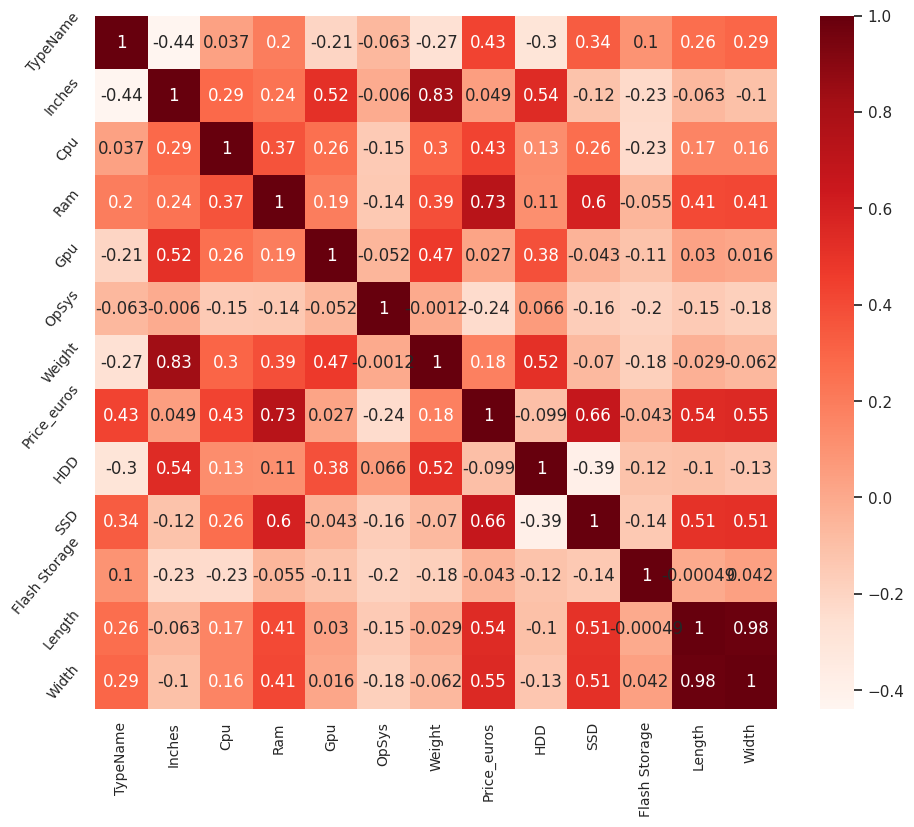

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(11, 9)})
sns.heatmap(df.corr(), annot = True, cmap = "Reds")
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=10, rotation=50)
plt.show()

Посмотрим рапределения признаков и сравним с нормальным. Видим, что большинство признаков не распределено нормально, это еще одно обоснование того, почему линейная регрессия не работает точно.

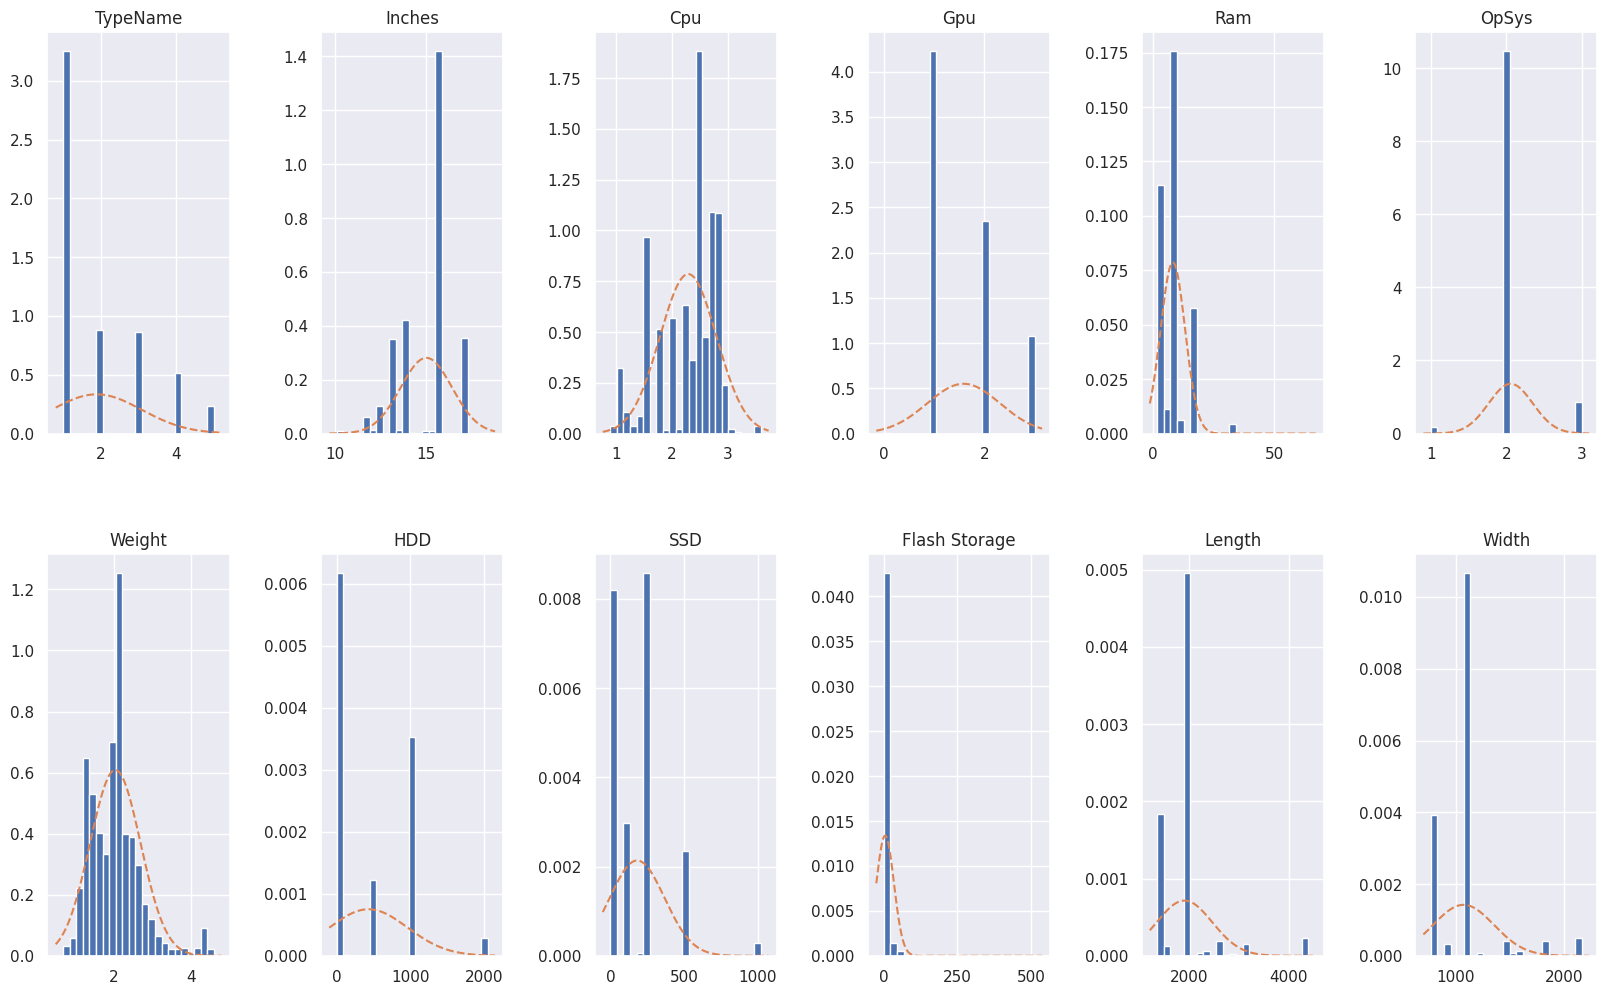

In [ ]:
from scipy import stats
import numpy as np
keys = ['TypeName', 'Inches', 'Cpu', 'Gpu', 'Ram', 'OpSys', 'Weight', 'HDD', 'SSD', 'Flash Storage', 'Length', 'Width']

fig, axes = plt.subplots(2, 6)
plt.subplots_adjust(wspace=0.5, hspace=0.3)
fig.set_size_inches(20, 12)
axes = axes.flatten()

for key, ax in zip(keys, axes):
    ax.hist(df[key], density=True, bins=23)
    
    loc = df[key].mean()
    scale = df[key].std()
    
    x_left, x_right = ax.get_xlim()
    x = np.linspace(x_left, x_right, 10000)
    y = stats.norm.pdf(x, loc=loc, scale=scale)
    
    ax.plot(x, y, linestyle='dashed')
    ax.set_title(key)

In [ ]:
price = pd.Series(df.Price_euros)
df = df.drop('Price_euros', axis = 1)

# Масштабирование данных


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

std = StandardScaler()

X_std = std.fit_transform(df)

X_std = pd.DataFrame(X_std, columns = df.columns)
X_std

,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,HDD,SSD,Flash Storage,Length,Width
0,0.931564,-1.221219,-0.976340,-0.071167,-0.810327,-3.611933,-1.068903,-0.810748,-0.974547,4.143846,-0.839960,-0.602717
1,0.931564,0.258515,0.795916,1.505896,1.948020,-3.611933,-0.321084,-0.810748,1.767526,-0.146663,1.740819,2.603663
2,0.931564,-1.221219,1.583585,-0.071167,-0.810327,-3.611933,-1.023118,-0.810748,0.396489,-0.146663,1.167313,1.891134
3,-0.741326,0.399442,1.386668,-0.859699,1.948020,-0.200150,0.090980,0.131018,-0.974547,-0.146663,-0.972583,-1.072986
4,0.931564,0.258515,-0.188671,1.505896,-0.810327,-3.611933,-0.000590,-0.810748,-0.974547,8.434355,1.740819,2.603663
...,...,...,...,...,...,...,...,...,...,...,...,...
1103,-0.741326,0.399442,0.402081,-0.859699,0.568847,-0.200150,0.243596,0.131018,-0.974547,-0.146663,-0.972583,-1.072986
1104,1.768009,-0.727974,0.402081,-0.859699,-0.810327,-0.200150,-0.366868,-0.810748,-0.289029,-0.146663,0.020300,0.038559
1105,-0.741326,-0.727974,-1.370175,-1.253965,-0.810327,-0.200150,-0.824717,-0.810748,-0.974547,1.998591,-0.972583,-1.072986
1106,-0.741326,0.399442,0.402081,-0.465433,1.948020,-0.200150,0.228335,1.117988,-0.974547,-0.146663,-0.972583,-1.072986


In [ ]:
mmsc = MinMaxScaler()

X_norm = mmsc.fit_transform(df)

X_norm = pd.DataFrame(X_norm, columns = df.columns)

X_norm

,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,HDD,SSD,Flash Storage,Length,Width
0,0.50,0.385542,0.333333,0.096774,0.333333,0.0,0.166240,0.000000,0.000,0.250,0.024520,0.094828
1,0.50,0.638554,0.666667,0.225806,1.000000,0.0,0.291560,0.000000,0.500,0.000,0.501657,0.741379
2,0.50,0.385542,0.814815,0.096774,0.333333,0.0,0.173913,0.000000,0.250,0.000,0.395626,0.597701
3,0.00,0.662651,0.777778,0.032258,1.000000,0.5,0.360614,0.244141,0.000,0.000,0.000000,0.000000
4,0.50,0.638554,0.481481,0.225806,0.333333,0.0,0.345269,0.000000,0.000,0.500,0.501657,0.741379
...,...,...,...,...,...,...,...,...,...,...,...,...
1103,0.00,0.662651,0.592593,0.032258,0.666667,0.5,0.386189,0.244141,0.000,0.000,0.000000,0.000000
1104,0.75,0.469880,0.592593,0.032258,0.333333,0.5,0.283887,0.000000,0.125,0.000,0.183565,0.224138
1105,0.00,0.469880,0.259259,0.000000,0.333333,0.5,0.207161,0.000000,0.000,0.125,0.000000,0.000000
1106,0.00,0.662651,0.592593,0.064516,1.000000,0.5,0.383632,0.500000,0.000,0.000,0.000000,0.000000


In [ ]:
y = price

# С разделением данных

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size = 0.15, random_state = 43)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("MAE", metrics.mean_absolute_error(y_test, y_pred))
print("MSE", metrics.mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MAE 231.89062083922883
MSE 108142.90005368764
R2 Score: 0.7148987468929157


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size = 0.15, random_state = 14)

model1 = LinearRegression()
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)

print("MAE", metrics.mean_absolute_error(y_test, y_pred))
print("MSE", metrics.mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MAE 253.68990759139348
MSE 110834.17867504989
R2 Score: 0.7608982980856449


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size = 0.15, random_state = 34)

model2 = LinearRegression()
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)

print("MAE", metrics.mean_absolute_error(y_test, y_pred))
print("MSE", metrics.mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MAE 247.42263744654852
MSE 116519.00263478112
R2 Score: 0.7381633755149264


# Массив признаков

В моделях, обученных на масштабированных данных, все коэффициенты значимые и находятся приближительно в одном диапазоне. У модели, обученной на изначальном датасете, видим среди признаков те, которые практически не влияют. Их коэффициент < 1, в то время как у других - от 20 до 200.

In [ ]:
features = df.columns
coeff_df = pd.DataFrame(model.coef_, columns=['Coefficient'])  
coeff_df['features'] = features
coeff_df.sort_values(by='Coefficient')

,Coefficient,features
5,-400.789492,OpSys
4,-269.443775,Gpu
7,-66.256517,HDD
1,147.113599,Inches
9,163.115638,Flash Storage
10,176.084173,Length
6,417.319397,Weight
11,452.116699,Width
0,559.792113,TypeName
2,630.573086,Cpu


In [ ]:
features = df.columns
coeff_df = pd.DataFrame(model1.coef_, columns=['Coefficient'])  
coeff_df['features'] = features
coeff_df.sort_values(by='Coefficient')

,Coefficient,features
5,-182.186684,OpSys
4,-100.662641,Gpu
10,-0.097433,Length
7,-0.022515,HDD
9,0.210053,Flash Storage
11,0.641059,Width
8,0.730231,SSD
1,17.777935,Inches
3,51.590980,Ram
6,114.398894,Weight


In [ ]:
features = df.columns
coeff_df = pd.DataFrame(model2.coef_, columns=['Coefficient'])  
coeff_df['features'] = features
coeff_df.sort_values(by='Coefficient')

,Coefficient,features
4,-67.438335,Gpu
5,-51.486240,OpSys
10,-26.823943,Length
7,-10.214980,HDD
9,13.949222,Flash Storage
1,21.543001,Inches
6,67.821103,Weight
2,124.694470,Cpu
8,151.375087,SSD
11,156.244304,Width


# Тест

In [ ]:
t = pd.read_csv('Price_euros_test.csv', sep = ',')
t

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
0,86,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,1TB HDD,AMD Radeon R5,Windows 10,2.1kg
1,1249,Razer,Blade Pro,Gaming,14.0,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,1TB SSD,Nvidia GeForce GTX 1060,Windows 10,1.95kg
2,122,Asus,VivoBook S15,Notebook,15.6,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,256GB SSD,Nvidia GeForce 940MX,Windows 10,1.7kg
3,993,Asus,Rog GL753VE-DS74,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.99kg
4,739,Dell,Inspiron 3567,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,12GB,1TB HDD,Intel HD Graphics 620,Windows 10,2.25kg
...,...,...,...,...,...,...,...,...,...,...,...,...
190,876,HP,Probook 450,Notebook,15.6,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4GB,500GB HDD,Intel HD Graphics 520,Windows 10,2.07kg
191,282,Acer,Aspire A515-51G,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,1TB HDD,Nvidia GeForce MX130,Windows 10,2.2kg
192,528,HP,Spectre X360,Ultrabook,13.3,IPS Panel Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.32kg
193,1204,Dell,Inspiron 5578,2 in 1 Convertible,15.6,Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,16GB,512GB SSD,Intel HD Graphics 620,Windows 10,2.09kg


In [ ]:
t = t.drop(['laptop_ID', 'Product'], axis = 1)

In [ ]:
t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           195 non-null    object 
 1   TypeName          195 non-null    object 
 2   Inches            195 non-null    float64
 3   ScreenResolution  193 non-null    object 
 4   Cpu               195 non-null    object 
 5   Ram               195 non-null    object 
 6   Memory            195 non-null    object 
 7   Gpu               195 non-null    object 
 8   OpSys             183 non-null    object 
 9   Weight            191 non-null    object 
dtypes: float64(1), object(9)
memory usage: 15.4+ KB


Пропуски заполняю аналогично тренировочному датасету.

Преобразовываю Ram, Weight, Cpu, ScreenResolution, Memory, Gpu, как и в тренировочном датасете.

In [ ]:
t.Weight = t.Weight.str.replace('kg', '')
t.Weight = pd.to_numeric(t.Weight)
t['Weight'] = t['Weight'].fillna(t.Weight.mode()[0])

os = list(t.OpSys)
for i in range(len(os)):
  if not(isinstance(os[i], str)):
    if len(t[t.Company == t.loc[i].Company].OpSys.mode()) > 0:
      os[i] = t[t.Company == t.loc[i].Company].OpSys.mode()[0]
    else:
      os[i] = 'Windows 10'
t.OpSys = os
t = t.drop('Company', axis = 1)

t.Ram = t.Ram.str.replace('GB', '')
t.Ram = pd.to_numeric(t.Ram)

new_memory = {i: Memory(t['Memory'].values[i]) for i in range(len(t))}
new_memory = pd.DataFrame(new_memory).T
t = pd.merge(t, new_memory, left_index = True, right_index = True, how = 'left')
t = t.drop('Memory', axis = 1)

t.Cpu = [float(i[-1].replace('GHz', '')) for i in (t.Cpu.str.split(' ').values)]

In [ ]:
sc = t.ScreenResolution
length = np.zeros(len(sc))
width = np.zeros(len(sc))

for i in range(len(sc)):
  if not(isinstance(sc[i], str)):
    length[i] = np.nan
    width[i] = np.nan
    continue
  j = 0
  res = ''
  while j < len(sc[i]):
    if sc[i][j].isdigit():
      res += sc[i][j]
    j += 1

  h = res[:4]
  w = res[4:]
  length[i] = h
  width[i] = w

t['Length'] = pd.Series(length)
t['Width'] = pd.Series(width)
t['Length'] = pd.to_numeric(t['Length'])
t['Width'] = pd.to_numeric(t['Width'])
t = t.drop('ScreenResolution', axis = 1)

In [ ]:
t.Length = t.Length.fillna(t.Length.mode()[0])
t.Width = t.Width.fillna(t.Width.mode()[0])

t.Gpu = [float(get_gpu(t.loc[i].Gpu)) for i in range(len(t))]
t.OpSys = [float(get_os(str(t.loc[i].OpSys))) for i in range(len(t))]
t.TypeName = [float(get_tn(t.loc[i].TypeName)) for i in range(len(t))]

In [ ]:
t.head(5)

,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,HDD,SSD,Flash Storage,Length,Width
0,1.0,15.6,3.0,4,3.0,2.0,2.10,1024.0,0.0,0.0,1366.0,768.0
1,2.0,14.0,2.8,16,2.0,2.0,1.95,0.0,1024.0,0.0,1920.0,1080.0
2,1.0,15.6,1.8,8,2.0,2.0,1.70,0.0,256.0,0.0,1920.0,1080.0
3,2.0,17.3,2.8,16,2.0,2.0,2.99,1024.0,256.0,0.0,1920.0,1080.0
4,1.0,15.6,2.5,12,1.0,2.0,2.25,1024.0,0.0,0.0,1366.0,768.0


Масштабируем.

In [ ]:
std1 = StandardScaler()

X_std1 = std1.fit_transform(t)

X_std1 = pd.DataFrame(X_std1, columns = t.columns)
X_std1

,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,HDD,SSD,Flash Storage,Length,Width
0,-0.808867,0.461410,1.379441,-0.876417,2.059107,-0.064911,0.077540,1.274723,-0.998822,-0.171281,-0.935076,-1.058035
1,0.004169,-0.635009,0.976338,1.459364,0.635257,-0.064911,-0.142916,-0.743487,4.226622,-0.171281,-0.001866,0.022448
2,-0.808867,0.461410,-1.039180,-0.097823,0.635257,-0.064911,-0.510342,-0.743487,0.307539,-0.171281,-0.001866,0.022448
3,0.004169,1.626355,0.976338,1.459364,0.635257,-0.064911,1.385577,1.274723,0.307539,-0.171281,-0.001866,0.022448
4,-0.808867,0.461410,0.371682,0.680770,-0.788594,-0.064911,0.297996,1.274723,-0.998822,-0.171281,-0.935076,-1.058035
...,...,...,...,...,...,...,...,...,...,...,...,...
190,-0.808867,0.461410,-0.031421,-0.876417,-0.788594,-0.064911,0.033449,0.241967,-0.998822,-0.171281,-0.001866,0.022448
191,-0.808867,0.461410,-1.039180,-0.097823,0.635257,-0.064911,0.224510,1.274723,-0.998822,-0.171281,-0.001866,0.022448
192,0.817206,-1.114693,0.774786,-0.097823,-0.788594,-0.064911,-1.068829,-0.743487,0.307539,-0.171281,-0.001866,0.022448
193,1.630243,0.461410,0.774786,1.459364,-0.788594,-0.064911,0.062843,-0.743487,1.613900,-0.171281,-0.001866,0.022448


In [ ]:
mmsc1 = MinMaxScaler()

X_norm1 = mmsc.fit_transform(t)

X_norm1 = pd.DataFrame(X_norm1, columns = t.columns)

X_norm1

,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,HDD,SSD,Flash Storage,Length,Width
0,0.00,0.716667,1.000000,0.066667,1.0,0.5,0.312169,0.500000,0.000,0.0,0.000000,0.000000
1,0.25,0.450000,0.894737,0.466667,0.5,0.5,0.272487,0.000000,1.000,0.0,0.183565,0.224138
2,0.00,0.716667,0.368421,0.200000,0.5,0.5,0.206349,0.000000,0.250,0.0,0.183565,0.224138
3,0.25,1.000000,0.894737,0.466667,0.5,0.5,0.547619,0.500000,0.250,0.0,0.183565,0.224138
4,0.00,0.716667,0.736842,0.333333,0.0,0.5,0.351852,0.500000,0.000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
190,0.00,0.716667,0.631579,0.066667,0.0,0.5,0.304233,0.244141,0.000,0.0,0.183565,0.224138
191,0.00,0.716667,0.368421,0.200000,0.5,0.5,0.338624,0.500000,0.000,0.0,0.183565,0.224138
192,0.50,0.333333,0.842105,0.200000,0.0,0.5,0.105820,0.000000,0.250,0.0,0.183565,0.224138
193,0.75,0.716667,0.842105,0.466667,0.0,0.5,0.309524,0.000000,0.500,0.0,0.183565,0.224138


In [ ]:
y_test = model.predict(X_norm1)
result = pd.DataFrame()
result['index'] = [i for i in range(0, 195)]
result['Price_euros'] = y_test
result.to_csv('Price_result_norm.csv', sep = ',', index = False)
result

,index,Price_euros
0,0,785.135528
1,1,3254.000350
2,2,1298.542358
3,3,2856.713290
4,4,1840.569190
...,...,...
190,190,969.562636
191,191,1133.985306
192,192,1913.506527
193,193,3316.857260


In [ ]:
y_test = model1.predict(t)
result = pd.DataFrame()
result['index'] = [i for i in range(0, 195)]
result['Price_euros'] = y_test
result.to_csv('Price_result.csv', sep = ',', index = False)
result

,index,Price_euros
0,0,534.081687
1,1,2219.372522
2,2,861.084685
3,3,1813.141501
4,4,1044.340084
...,...,...
190,190,720.468836
191,191,708.289596
192,192,1380.460848
193,193,2251.782419


In [ ]:
y_test = model2.predict(X_std1)
result = pd.DataFrame()
result['index'] = [i for i in range(0, 195)]
result['Price_euros'] = y_test
result.to_csv('Price_result_std.csv', sep = ',', index = False)
result

,index,Price_euros
0,0,511.425308
1,1,2194.274717
2,2,825.671413
3,3,1732.787887
4,4,987.819241
...,...,...
190,190,678.889064
191,191,657.143432
192,192,1331.391275
193,193,2162.575789
